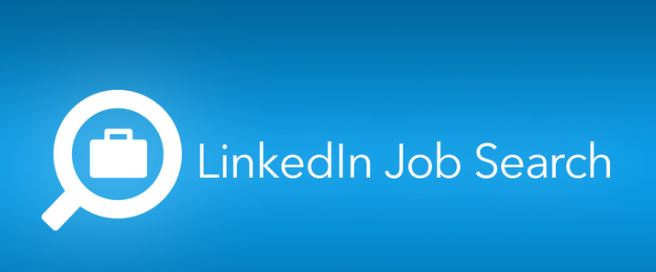

<b>Data Analyst and analyst-related roles from Linkedin Jobs for 3 regions: Africa, Canada and United States.</b>
 
<p></p>
 
The analysis accesses the data from Kaggle, undergoes data cleaning and then subsequently extract insights.

The attempt is to observe: 
- The frequency of job posts in the 3 different regions, 
- How salaries differs (where stipulated), 
- Industries where data analysts are most required
- Ranks of companies which posts most job roles for analysts, and so on 


In [1]:
# import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import kaggle
import warnings
import zipfile
import os
import glob
import re
warnings.filterwarnings('ignore')

sns.set_style('dark')
%matplotlib inline

In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('cedricaubin/linkedin-data-analyst-jobs-listings', unzip=False)

In [3]:
# use zipfile to unzip the zipped folder into a new folder, and name it
with zipfile.ZipFile('linkedin-data-analyst-jobs-listings.zip', 'r') as unzip_this:
    unzip_this.extractall('linkedin-data-analyst-jobs-listings')

In [4]:
# use glob module to combine the csv files in the extracted folder
folder = glob.glob('./linkedin-data-analyst-jobs-listings/*.csv')

# create a variable to append all the csv
data = [] 

# for loop to 
for file in folder:
    data.append(pd.read_csv(file))

In [5]:
df = pd.concat(data)

In [6]:
# the last 5 rows in the data frame
df.tail(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
2842,Data Analyst,SmartSense by Digi,"Join a high-performing, tight-knit team at a f...",hybrid,NaN,"Mishawaka, IN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
2843,Data Analyst,Synergy Search,Nashville (Berry Hill) based company looking t...,hybrid,"$85,000.00\r\n -\r\n $95...",Nashville Metropolitan Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-14,https://www.linkedin.com/jobs/view/data-analys...
2844,Data Analyst,Insight Global,Overview - Minimum 5 years in a quantitative d...,hybrid,"$130,000.00\r\n -\r\n $1...","Burbank, CA","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-14,https://www.linkedin.com/jobs/view/data-analys...


##### the last 5 rows show that index is not reset

In [7]:
# reset the index permanently in place 
df.reset_index(drop=True, inplace=True)
df.tail(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
8487,Data Analyst,SmartSense by Digi,"Join a high-performing, tight-knit team at a f...",hybrid,NaN,"Mishawaka, IN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
8488,Data Analyst,Synergy Search,Nashville (Berry Hill) based company looking t...,hybrid,"$85,000.00\r\n -\r\n $95...",Nashville Metropolitan Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-14,https://www.linkedin.com/jobs/view/data-analys...
8489,Data Analyst,Insight Global,Overview - Minimum 5 years in a quantitative d...,hybrid,"$130,000.00\r\n -\r\n $1...","Burbank, CA","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-14,https://www.linkedin.com/jobs/view/data-analys...


In [8]:
df.info() # to check summary of data types, non-null values, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          8490 non-null   object
 1   company        8490 non-null   object
 2   description    8490 non-null   object
 3   onsite_remote  8490 non-null   object
 4   salary         965 non-null    object
 5   location       8490 non-null   object
 6   criteria       8490 non-null   object
 7   posted_date    8490 non-null   object
 8   link           8490 non-null   object
dtypes: object(9)
memory usage: 597.1+ KB


`

#### Data cleaning

In [9]:
df.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [10]:
# converting the date column from object to date
df['posted_date'] = pd.to_datetime(df['posted_date']) 

In [11]:
for file in folder:
    print(file)

./linkedin-data-analyst-jobs-listings\linkedin-jobs-africa.csv
./linkedin-data-analyst-jobs-listings\linkedin-jobs-canada.csv
./linkedin-data-analyst-jobs-listings\linkedin-jobs-usa.csv


In [12]:
print('Africa jobs has:', len(pd.read_csv(folder[0])), 'listings')
print('Canada jobs has:', len(pd.read_csv(folder[1])), 'listings')
print('US jobs has:', len(pd.read_csv(folder[2])), 'listings')

Africa jobs has: 2872 listings
Canada jobs has: 2773 listings
US jobs has: 2845 listings


In [13]:
# splitting the location column
df[['city', 'province/state', 'country']] = df.location.str.split(',', expand=True)

In [14]:
# checking the uniqueness of country column
print('Total number of countries: ', df['country'].nunique())
df['country'].unique()

Total number of countries:  13


array([' Egypt', None, ' South Africa', ' Kenya', ' Botswana', ' Senegal',
       ' Tunisia', ' The Gambia', ' Nigeria', ' Morocco', ' Ghana',
       ' Mali', ' Zimbabwe', ' Canada'], dtype=object)

In [15]:
df['country'].value_counts(dropna=False)

NaN              4031
 Canada          2280
 South Africa    1096
 Botswana         272
 Nigeria          215
 Egypt            149
 Kenya            126
 Ghana             78
 Mali              76
 Morocco           52
 Tunisia           38
 Zimbabwe          38
 Senegal           36
 The Gambia         3
Name: country, dtype: int64

In [16]:
# examining location column which shows 'None' as its name, especially the latter part of the data
df.country.iloc[5644:].unique()

array([' Canada', None], dtype=object)

In [17]:
# fill country column for all US rows - 
df.country.iloc[5645:].fillna('United States', inplace=True)

In [18]:
df.country.unique()

array([' Egypt', None, ' South Africa', ' Kenya', ' Botswana', ' Senegal',
       ' Tunisia', ' The Gambia', ' Nigeria', ' Morocco', ' Ghana',
       ' Mali', ' Zimbabwe', ' Canada', 'United States'], dtype=object)

In [19]:
# other countries with 'None' or Nan in country column
df[df.country.isna()]
len(df[df.country.isna()])

1186

In [20]:
# fill missing values in country column...either with Province/State or City value
df['country'] = df['country'].fillna(df['province/state'].fillna(df['city']))

In [21]:
# check to see if Nan or None still remains
df[df.country.isna()]

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,city,province/state,country


##### all the rows in the country columns with Nan have been filled

`

In [22]:
# distinct country in the column
df['country'].unique()

array([' Egypt', ' Kenya', ' South Africa', ' Botswana', ' Senegal',
       ' Tunisia', ' The Gambia', 'Ghana', ' Nigeria', ' Morocco',
       ' Burkina Faso', ' Ghana', 'Egypt', 'Eastern Africa',
       'South Africa', ' Mali', 'Kenya', ' Zimbabwe',
       'Johannesburg Metropolitan Area', ' Canada',
       'Greater Montreal Metropolitan Area', 'Canada', 'United States'],
      dtype=object)

In [23]:
# replace 'Johannesburg Metropolitan Area' and 'Greater Montreal Metropolitan Area' with actual country names 
df.loc[df['country'] == 'Johannesburg Metropolitan Area', 'country'] = 'South Africa'
df.loc[df['country'] == 'Greater Montreal Metropolitan Area', 'country'] = 'Canada'

In [24]:
print('Total countries:',df['country'].nunique())
df['country'].unique()

Total countries: 21


array([' Egypt', ' Kenya', ' South Africa', ' Botswana', ' Senegal',
       ' Tunisia', ' The Gambia', 'Ghana', ' Nigeria', ' Morocco',
       ' Burkina Faso', ' Ghana', 'Egypt', 'Eastern Africa',
       'South Africa', ' Mali', 'Kenya', ' Zimbabwe', ' Canada', 'Canada',
       'United States'], dtype=object)

In [25]:
# some countries appear twice because of either leading or trailing space
df['country'].value_counts()

United States     2845
 Canada           2404
 South Africa     1210
Canada             369
 Botswana          308
South Africa       228
 Nigeria           215
 Kenya             198
 Egypt             187
Egypt               87
 Ghana              78
 Mali               76
Ghana               56
 Morocco            52
 Zimbabwe           38
 Tunisia            38
Eastern Africa      38
 Senegal            36
Kenya               22
 The Gambia          3
 Burkina Faso        2
Name: country, dtype: int64

In [26]:
# to remove both the leading and trailing white spaces
df['country'] = df['country'].str.strip()

In [27]:
print('Total number of countries after cleaning leading/trailing spaces: ', df['country'].nunique())
df['country'].unique()

Total number of countries after cleaning leading/trailing spaces:  16


array(['Egypt', 'Kenya', 'South Africa', 'Botswana', 'Senegal', 'Tunisia',
       'The Gambia', 'Ghana', 'Nigeria', 'Morocco', 'Burkina Faso',
       'Eastern Africa', 'Mali', 'Zimbabwe', 'Canada', 'United States'],
      dtype=object)

`

In [28]:
# function to remove the parentheses and hard brackets in CRITERIA column
def clean_string(string):
    clean = string.replace("[", "").replace("]", "").replace("{", "").replace("}", "").replace("'",'').replace("'",'')
    return clean


# clean_string function applied on CRITERIA column
df['criteria'] = df['criteria'].apply(clean_string)


df.head(2)


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,city,province/state,country
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","مستوى الأقدمية: غير مطبق, نوع التوظيف: دوام كا...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Cairo,Cairo,Egypt
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","Seniority level: Associate, Employment type: F...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Nairobi County,Kenya,Kenya


In [29]:
# split the 'criteria' column into four separate columns
df[['position level', 'employment type', 'job function', 'industries']] = df['criteria'].str.split(',', expand=True, n=3)

In [30]:
# remove unwanted characters and strip the leading/trailing whitespaces from the newly created columns
df['position level'] = df['position level'].str.split(':').str[1].str.strip()
df['employment type'] = df['employment type'].str.split(':').str[1].str.strip()
df['job function'] = df['job function'].str.split(':').str[1].str.strip()
df['industries'] = df['industries'].str.split(':').str[1].str.strip()

In [31]:
df.head(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,city,province/state,country,position level,employment type,job function,industries
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","مستوى الأقدمية: غير مطبق, نوع التوظيف: دوام كا...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Cairo,Cairo,Egypt,غير مطبق,دوام كامل,محلل,التكنولوجيا والمعلومات والإنترنت
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","Seniority level: Associate, Employment type: F...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Nairobi County,Kenya,Kenya,Associate,Full-time,Analyst,Financial Services
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","Seniority level: Not Applicable, Employment ty...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...,Cape Town,Western Cape,South Africa,Not Applicable,Full-time,Analyst,"Technology, Information and Internet"


`

In [32]:
# expand the salary column into min and max salary
df[['min salary', 'max salary']] = df['salary'].str.split('-\r\n', expand=True)
df[['min salary', 'max salary']].tail()

,min salary,max salary
8485,NaN,NaN
8486,"$75,000.00\r\n","$95,000.00"
8487,NaN,NaN
8488,"$85,000.00\r\n","$95,000.00"
8489,"$130,000.00\r\n","$150,000.00"


In [33]:
# remove unwanted characters from the two columns just created
df['min salary'] = df['min salary'].str.replace(r'[\$\,\r\n]+', '', regex=True)
df['max salary'] = df['max salary'].str.replace(r'[\$\,\r\n]+', '', regex=True)

In [34]:
# check if salary columns unwanted characters are all removed 
df[['min salary', 'max salary']].tail()

,min salary,max salary
8485,NaN,NaN
8486,75000.00,95000.00
8487,NaN,NaN
8488,85000.00,95000.00
8489,130000.00,150000.00


`

In [35]:
# reorder the columns
df = df[['title', 'company', 'description', 'onsite_remote', 'min salary', 'max salary','salary',
         'location', 'criteria', 'position level', 'employment type', 'job function', 'industries', 
         'posted_date', 'link', 'city', 'province/state','country']]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            8490 non-null   object        
 1   company          8490 non-null   object        
 2   description      8490 non-null   object        
 3   onsite_remote    8490 non-null   object        
 4   min salary       965 non-null    object        
 5   max salary       965 non-null    object        
 6   salary           965 non-null    object        
 7   location         8490 non-null   object        
 8   criteria         8490 non-null   object        
 9   position level   8361 non-null   object        
 10  employment type  7919 non-null   object        
 11  job function     7919 non-null   object        
 12  industries       7918 non-null   object        
 13  posted_date      8490 non-null   datetime64[ns]
 14  link             8490 non-null   object 

In [37]:
# convert "min salary" column to numeric
df['min salary'] = pd.to_numeric(df['min salary'], errors='coerce')
df['max salary'] = pd.to_numeric(df['max salary'], errors='coerce')

In [38]:
# back up the copy of cleaned data
data_backup = df.copy

In [39]:
df.columns

Index(['title', 'company', 'description', 'onsite_remote', 'min salary',
       'max salary', 'salary', 'location', 'criteria', 'position level',
       'employment type', 'job function', 'industries', 'posted_date', 'link',
       'city', 'province/state', 'country'],
      dtype='object')

In [40]:
# remove columns not of interest for the exploratory data analysis
df.drop(columns=['description', 'salary','location', 'criteria', 'link'], axis=1, inplace=True)

In [41]:
df.head(3)

,title,company,onsite_remote,min salary,max salary,position level,employment type,job function,industries,posted_date,city,province/state,country
0,Data Analyst,NNC,onsite,NaN,NaN,غير مطبق,دوام كامل,محلل,التكنولوجيا والمعلومات والإنترنت,2022-11-18,Cairo,Cairo,Egypt
1,Data Analyst,Watu Credit,onsite,NaN,NaN,Associate,Full-time,Analyst,Financial Services,2022-11-01,Nairobi County,Kenya,Kenya
2,Data Analyst (Credit Risk),Kuda,onsite,NaN,NaN,Not Applicable,Full-time,Analyst,"Technology, Information and Internet",2022-11-21,Cape Town,Western Cape,South Africa


`

### Exploratory Data Analysis (EDA) & Insights Extraction

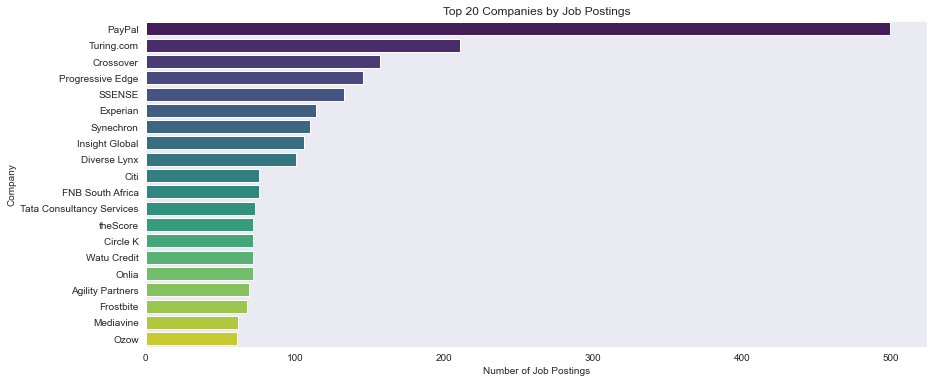

In [42]:
# ranks of first 20 companies with job postings

top_companies = df['company'].value_counts().head(20)

plt.figure(figsize=(14,6))
sns.countplot(y='company', data=df, order=top_companies.index, palette='viridis')
plt.title('Top 20 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.show()

In [43]:
# how the first 15 companies are divided by job postings, and by countries
df[['company','country']].value_counts().head(15)

company           country      
PayPal            United States    499
Progressive Edge  South Africa     146
SSENSE            Canada           133
Turing.com        Nigeria          129
Experian          South Africa     114
Synechron         Canada           110
Insight Global    United States     97
Diverse Lynx      Canada            91
FNB South Africa  South Africa      76
Citi              Canada            76
theScore          Canada            72
Onlia             Canada            72
Watu Credit       Kenya             72
Agility Partners  United States     69
Mediavine         United States     62
dtype: int64

.

In [44]:
df['country'].unique()

array(['Egypt', 'Kenya', 'South Africa', 'Botswana', 'Senegal', 'Tunisia',
       'The Gambia', 'Ghana', 'Nigeria', 'Morocco', 'Burkina Faso',
       'Eastern Africa', 'Mali', 'Zimbabwe', 'Canada', 'United States'],
      dtype=object)

In [45]:
# pick out the african countries alone for grouping
africa_countries = ['Kenya', 'South Africa', 'Botswana', 'Senegal', 'The Gambia', 'Ghana', 'Nigeria', 
                   'Tunisia', 'Burkina Faso', 'Egypt', 'Eastern Africa', 'Mali', 'Morocco', 'Zimbabwe']

df['country_2'] = df['country'].apply(lambda x: 'Africa' if x in africa_countries else x)

In [46]:
df['country_2'].unique()

array(['Africa', 'Canada', 'United States'], dtype=object)

In [47]:
# splitting the data into regions (parts) for likely further analysis
africa = df.iloc[:2872]
canada = df.iloc[2872:5645]
us = df.iloc[5645:]

.

In [48]:
africa['country'].unique()

array(['Egypt', 'Kenya', 'South Africa', 'Botswana', 'Senegal', 'Tunisia',
       'The Gambia', 'Ghana', 'Nigeria', 'Morocco', 'Burkina Faso',
       'Eastern Africa', 'Mali', 'Zimbabwe'], dtype=object)

In [49]:
# function to calculate the total months and days for which job postings occured for each regions
def calculate_duration(df):
    diff = df['posted_date'].max() - df['posted_date'].min()
    months = diff.days // 30
    days = diff.days % 30
    return (months, days)

In [50]:
# use the function for each region
canada_duration = calculate_duration(canada)
africa_duration = calculate_duration(africa)
us_duration = calculate_duration(us)


# Print out the results for each region
print("Length of job postings for Africa: {} months, {} days".format(africa_duration[0], africa_duration[1]))
print("Length of job postings for Canada: {} months, {} days".format(canada_duration[0], canada_duration[1]))
print("Length of job postings for US: {} months, {} days".format(us_duration[0], us_duration[1]))


Length of job postings for Africa: 2 months, 27 days
Length of job postings for Canada: 6 months, 14 days
Length of job postings for US: 3 months, 13 days


##### Obviously, Africa has the least job postings period, and Canada the most - based on the source data

.

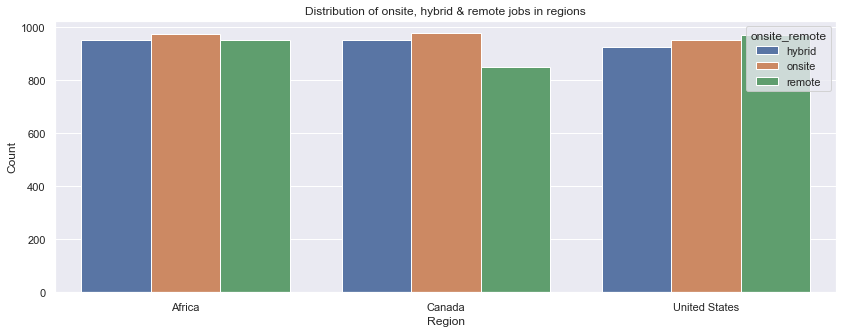

In [51]:
# the distribution of job modes or categories across the regions (Africa, Canada and United States) 
plt.figure(figsize=(14,5))
sns.set(style='darkgrid')
ax = sns.barplot(x='country_2', y='count', hue='onsite_remote', 
                 data=df.groupby(['country_2', 'onsite_remote']).size().reset_index(name='count'))

ax.set(xlabel='Region', ylabel='Count', title='Distribution of onsite, hybrid & remote jobs in regions')
plt.show()

##### United States tends to have the most remote roles while Canada, the least. 
##### Caveat: The timeframe of job posting isn't the same for the regions.

.

#### Distribution by job posting counts in Africa:

In [52]:
# distribution of job postings across African countries
africa['country'].value_counts()

South Africa      1438
Botswana           308
Egypt              274
Kenya              220
Nigeria            215
Ghana              134
Mali                76
Morocco             52
Zimbabwe            38
Tunisia             38
Eastern Africa      38
Senegal             36
The Gambia           3
Burkina Faso         2
Name: country, dtype: int64

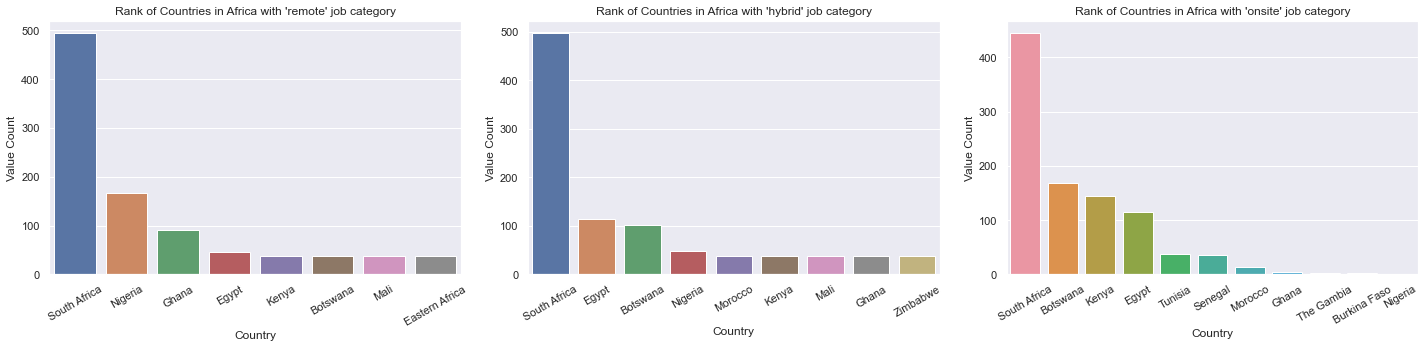

In [53]:
# Create a list of job categories
job_categories = ['remote', 'hybrid', 'onsite']

# Loop through the job categories and plot the bar charts
fig, axes = plt.subplots(nrows=1, ncols=len(job_categories), figsize=(20,5))

for i, category in enumerate(job_categories):
    df_africa = africa[africa['onsite_remote'] == category]     # Filter the dataframe by job category
    sns.barplot(x=df_africa['country'].value_counts().head(20).index,     # Create the bar plot
                y=df_africa['country'].value_counts().head(20).values,
                ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(f"Rank of Countries in Africa with '{category}' job category")
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel("Value Count")
    
    # Rotate x-axis labels for readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)

# Adjust the layout
plt.tight_layout()


##### NB: South Africa is observed to have the most of all categories of jobs (remote, hybrid and on-site)

.

### The trend of job postings across the 3 regions: Africa, Canada, United States

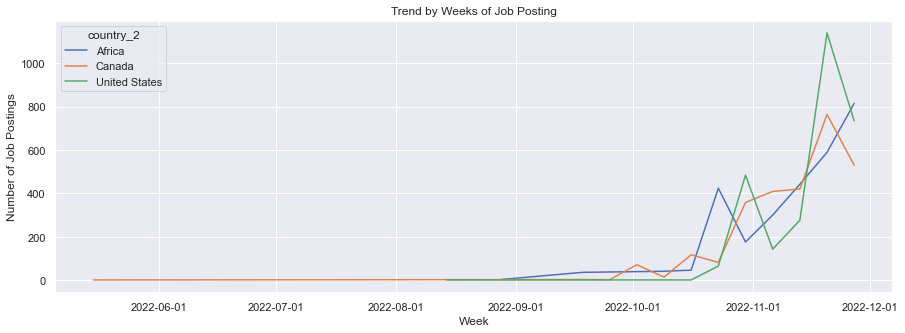

In [54]:
# Group the data by country and month, and count the number of job postings
grouped_country_by_week = df.groupby(['country_2', pd.Grouper(key='posted_date', 
                                                              freq='W')])['posted_date'].count().reset_index(name='count')

# Plot the trend by months of job posting
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='posted_date', y='count', hue='country_2', data=grouped_country_by_week)

# Set the title and labels
plt.title("Trend by Weeks of Job Posting")
plt.xlabel("Week")
plt.ylabel("Number of Job Postings")

# Format x-axis labels as weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()

.

### Average job postings per week across the regions

In [55]:
# Define the region list
region_list = [africa, canada, us]

# Use list comprehension to calculate average job postings per week for each region
results = [{'Region': region['country_2'].iloc[0], 
            'Average Postings per Week': region.groupby(pd.Grouper(key='posted_date', freq='W'))
            ['posted_date'].count().mean()} 
            for region in region_list]

# Create a DataFrame from the results
result_df = pd.DataFrame(results)

# Create a crosstab of the results
crosstab = pd.crosstab(result_df['Region'], columns='Average Postings per Week', 
                       values=result_df['Average Postings per Week'], aggfunc='mean')
crosstab

col_0,Average Postings per Week
Region,
Africa,205.142857
Canada,95.620690
United States,177.812500


`

### insights into salary range (min and max)

In [56]:
# summary statistics of minimum and maximum salaries
print(df[['min salary', 'max salary']].describe())

          min salary     max salary
count     964.000000     964.000000
mean    51038.103568   61377.172075
std     49163.664042   58031.562191
min        22.000000      24.000000
25%        40.000000      60.000000
50%     60000.000000   80000.000000
75%     90000.000000  115000.000000
max    135000.000000  155000.000000


##### seems certain jobs were included with unrealistic salaries such as 22,24,40,60 and even negative numbers. There is need to exclude such anomalies in salaries columns 

.

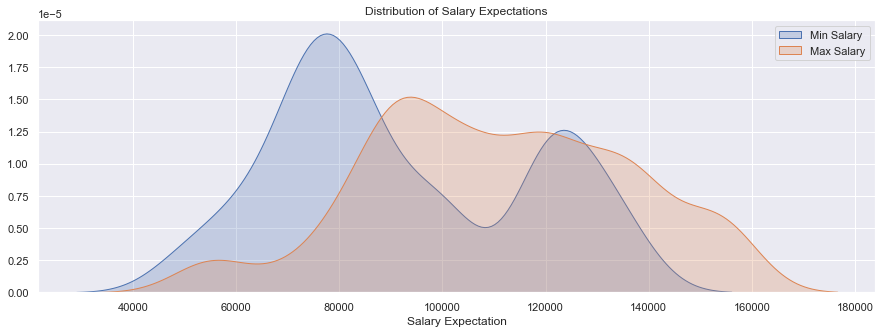

In [57]:
plt.figure(figsize=(15,5))
# Plot the KDE for 'min salary' and 'max salary'
sns.kdeplot(df[df['min salary'] > 15000]['min salary'].dropna(), shade=True, label='Min Salary')
sns.kdeplot(df[df['max salary'] > 15000]['max salary'].dropna(), shade=True, label='Max Salary')

# Add labels and title
plt.xlabel('Salary Expectation')
plt.ylabel(None)
plt.title('Distribution of Salary Expectations')
plt.legend()
plt.show()


###### some companies/countries have quite a high Min Salary for Analysts' roles

In [58]:
# Calculate the 90th percentile salary of Min Salary to check companies/countries paying that much
min_salary_90th_percentile = df['min salary'].quantile(0.9)

# Filter the dataframe based on the 90th percentile salary
filtered_df = df[df['min salary'] >= min_salary_90th_percentile]

#filtered_df[['company', 'country']].unique()
countries = filtered_df['country_2'].unique().tolist()
companies = filtered_df['company'].unique().tolist()

print(f"Companies with quite a high minimum salary are: \n {companies} \n and the countries they are from:\n {countries}")

Companies with quite a high minimum salary are: 
 ['Libitzky Property Companies', 'Storm2', 'EdgeLink', 'Gridiron IT', 'Insight Global'] 
 and the countries they are from:
 ['Canada', 'United States']


##### To check the the job titles of analyst roles for those companies and also the positions...

In [59]:
high_min_salary_coy = ['Libitzky Property Companies', 'Storm2', 'EdgeLink', 'Gridiron IT', 'Insight Global']

filtered_df[filtered_df['company'].isin(high_min_salary_coy)][
    ['company','country','title', 'position level','min salary', 'max salary']].drop_duplicates().reset_index(drop=True)


,company,country,title,position level,min salary,max salary
0,Libitzky Property Companies,Canada,Data Analyst,Entry level,135000.0,140000.0
1,Libitzky Property Companies,Canada,Data Analyst,NaN,135000.0,140000.0
2,Storm2,United States,Data Analyst,Mid-Senior level,120000.0,135000.0
3,EdgeLink,United States,Data Analyst,Mid-Senior level,125000.0,155000.0
4,Storm2,United States,Data Analyst,NaN,120000.0,135000.0
5,EdgeLink,United States,Data Analyst,NaN,125000.0,155000.0
6,Gridiron IT,United States,Data Analyst,Associate,120000.0,130000.0
7,Insight Global,United States,Data Analyst,Mid-Senior level,130000.0,150000.0
8,Storm2,United States,Data Analyst/ $100M Valuation/ Hybrid,NaN,120000.0,150000.0
9,Insight Global,United States,Data Analyst,NaN,130000.0,150000.0


##### Quite interesting to know that job levels such as Entry level, Associate and Mid-Senior levels earn above 100k dollars in those companies 

`

###### looking at % of job postings from regions with specified salary range; using either min salary or max salary column

In [60]:
africa_notnull_to_null = round(africa['min salary'].notnull().sum()/africa['min salary'].isnull().sum(),2)
canada_notnull_to_null = round(canada['min salary'].notnull().sum()/canada['min salary'].isnull().sum(),2)
us_notnull_to_null = round(us['min salary'].notnull().sum()/us['min salary'].isnull().sum(),2)

print(f"Percentage of job postings which include salary for \nAfrica, Canada and US respectively are: {africa_notnull_to_null}, {canada_notnull_to_null} and {us_notnull_to_null} ")

Percentage of job postings which include salary for 
Africa, Canada and US respectively are: 0.0, 0.01 and 0.48 


.

#### The requirement of job level (position) demanded

##### !unfortunately, there'll be need to filter out the columns with Arabic description in the 'position' column' !

In [62]:
position_wtout_arabic_description = df[~df['position level'].astype(str).str.contains('[\u0600-\u06FF]')]['position level']
position_wtout_arabic_description.value_counts()

Entry level         2591
Mid-Senior level    2376
Associate           1441
Not Applicable      1182
Full-time            276
Contract              55
Internship            41
Part-time             37
Volunteer              1
Executive              1
Name: position level, dtype: int64

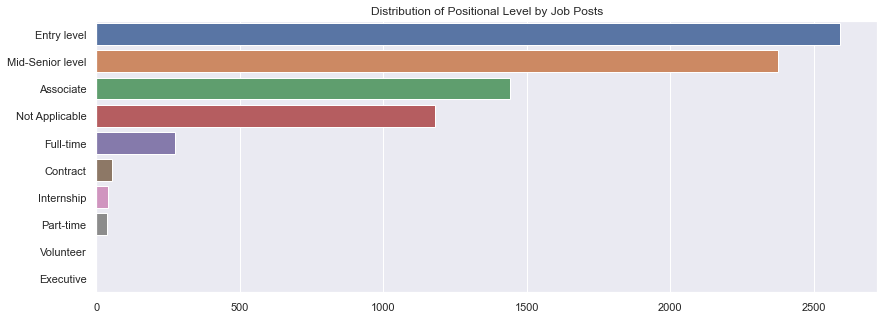

In [63]:
order = position_wtout_arabic_description.value_counts().index # order by descending count

plt.figure(figsize=(14,5)) # increase size of plot
sns.countplot(data=df, y=position_wtout_arabic_description, order=order)
plt.title('Distribution of Positional Level by Job Posts')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

`

#### Probing the employment types and how they rank

In [64]:
df.columns

Index(['title', 'company', 'onsite_remote', 'min salary', 'max salary',
       'position level', 'employment type', 'job function', 'industries',
       'posted_date', 'city', 'province/state', 'country', 'country_2'],
      dtype='object')

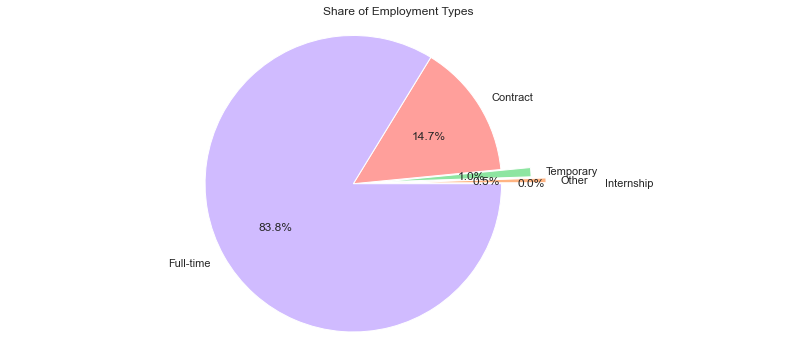

In [65]:
employment_wtout_arabic_description = df[~df['employment type'].astype(str).
                                         str.contains('[\u0600-\u06FF]')]['employment type']

explode = (0.6, 0.3, 0.2, 0, 0)
plt.figure(figsize=(14,6))
employment_wtout_arabic_description.value_counts(sort=True, ascending=True).plot(kind='pie', autopct='%1.1f%%',colors=sns.
                                                                          color_palette('pastel'), explode=explode)
plt.title('Share of Employment Types')
plt.axis('equal')
plt.ylabel(None)
plt.show()

.

### Industries across which analyst jobs are demanded

In [66]:
# to remove the column(s) with arabic in [industries] column
industries_wtout_arabic = df[~df['industries'].astype(str).str.contains('[\u0600-\u06FF]')]['industries']

industries_wtout_arabic

1                                      Financial Services
2                    Technology, Information and Internet
3                                      Financial Services
4       IT Services and IT Consulting and Wellness and...
6                           IT Services and IT Consulting
                              ...                        
8485                        IT Services and IT Consulting
8486                                   Financial Services
8487    IT Services and IT Consulting, Software Develo...
8488                              Entertainment Providers
8489    Entertainment Providers and Hospitals and Heal...
Name: industries, Length: 8203, dtype: object

In [67]:
# splits the comma-separated values in the industries column into separate columns and then counts the frequency 
# of each unique value in the first column,
industries_wtout_arabic.str.split(',\s*').apply(pd.Series)[0].value_counts()

IT Services and IT Consulting                        1577
Software Development                                  944
Financial Services                                    506
Technology                                            463
Staffing and Recruiting                               452
                                                     ... 
IT Services and IT Consulting and Musicians             1
Professional Services                                   1
Food and Beverage Services and Financial Services       1
Beverage Manufacturing                                  1
Civil Engineering                                       1
Name: 0, Length: 91, dtype: int64

In [68]:
top_15_industries = industries_wtout_arabic.str.split(',\s*').apply(pd.Series)[0].value_counts().head(15)

top_15_industries

IT Services and IT Consulting       1577
Software Development                 944
Financial Services                   506
Technology                           463
Staffing and Recruiting              452
Retail                               323
Advertising Services                 206
Insurance                            205
Banking                              175
Retail Apparel and Fashion           137
Business Consulting and Services     127
Human Resources Services             115
Information Services                 109
Appliances                           101
Telecommunications                    80
Name: 0, dtype: int64

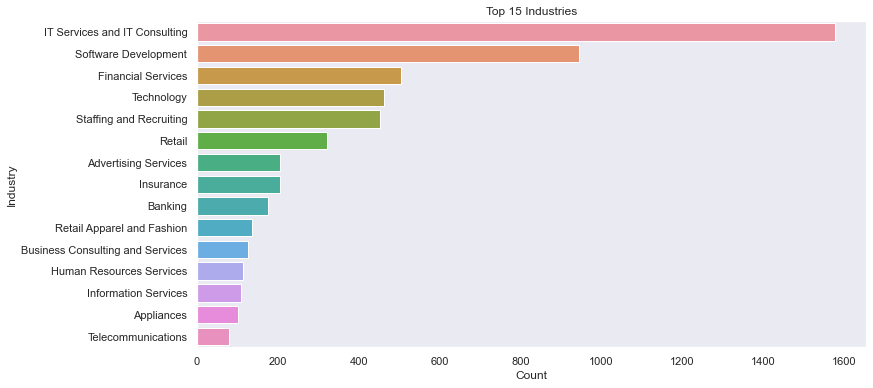

In [69]:
# Plot a count plot of the top 15 industries requiring different data analyst roles
sns.set_style('dark')
plt.figure(figsize=(12,6))
sns.countplot(y=industries_wtout_arabic.str.split(',\s*').apply(pd.Series)[0],order=top_15_industries.index)
plt.title('Top 15 Industries')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

##### Obviously, IT services/Consulting comes atop, and surprisingly, Telecoms, the last in the rank of top 15 industries

.